# Clase 17: Clustering

**MDS7202: Laboratorio de Programación Científica para Ciencia de Datos**

**Profesor: Ignacio Meza**


## Objetivos de la Clase


- Comprender cuál es la utilidad de las técnicas de clustering.
- Analizar diversos tipos de algoritmos de clustering.

## Clustering

Clustering es la tarea que consiste en agrupar observaciones similares en grupos llamados *clusters*. La idea es que los grupos solo contengan información similar.
Es una tarea usual al realizar Análisis Exploratorio de Datos (EDA), ya que permite encontrar de forma automatizada grupos de observaciones similares.

Ya que no es necesario que el dataset esté etiquetado, es una técnica de aprendizaje no-supervisado.

<div align='center'>
    <img src='https://github.com/MDS7202/MDS7202/blob/main/recursos/2023-01/17-Clustering/clustering.png?raw=true' width=800/>
</div>

<div align='center'>
    <span>Ejemplo de Clustering. Fuente: <a href='https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html'>Comparación de Clustering en Scikit-Learn.</a></span>
</div>

## Tipos de Clustering

Existen varias técnicas de clustering, las cuales se pueden clasificar en las siguientes categorías:


|  | **Particional** | **Jerárquico** | **Difuso** |
|---|---|---|---|
| Descripción | Divide los datos en clusters sin traslape, tal que cada dato está en un solo grupo y en ningún otro. | Agrupa ejemplos al ir estableciendo jerarquías entre estos, de tal manera que los datos son organizados como un árbol. | Cada objeto pertenece a cada cluster con un peso de pertenencia entre 0 y 1. |
| Ejemplos | K-Means, DBScan | Aglomerativo, Divisivo | Mixtura de Gaussianas |

## Clustering en `Scikit-learn`

Scikit-learn ofrece una gran gama de algoritmos de clustering para explorar.





<div align='center'>
    <img src='https://github.com/MDS7202/MDS7202/blob/main/recursos/2023-01/17-Clustering/cluster_comparison.png?raw=true' width=800/>
</div>

<div align='center'>
    <span>Ejemplo de los distintos métodos de Clustering ofrecidos por Scikit-Learn. </span>
    <br>
    Fuente: <a href='https://scikit-learn.org/stable/modules/clustering.html'>Clustering en Scikit-Learn.</a>
</div>

---

## Problema de Hoy: 🎸🤘 Caracterización Musical 🎼🎵 

<div align='center'>
<img src='https://github.com/MDS7202/MDS7202/blob/main/recursos/2023-01/17-Clustering/spotify.png?raw=true' width=200/>
</div>

 
    
Los atributos son: 

- `key`: escala de la canción. 0 = C, 1 = C♯/D♭, 2 = D...  [Mas información](https://en.wikipedia.org/wiki/Pitch_class).
- `modo`: 1 si la escala es mayor, 0 si es menor.
- `time_signature`: cuántos pulsos hay en cada compás. (4, 3,...).
- `loudness`: Volumen de la canción (rango -60, 0).


- `acousticness`: Probabilidad de que la canción sea solo acústica.
- `danceability`: Describe que tan bailable es la canción. (rango 0, 1).
- `energy`: Mide que tan energética es una canción (rango 0, 1).
- `instrumentalness`: Probabilidad que la canción contenga voces.
- `liveness`: Probabilidad de que la canción fuese grabada en vivo.
- `speechiness`: Probabilidad de que la canción sea exclusivamente vocal (ejemplo: podcast : 1). 
- `valence`: Sentimiento de la canción (rango 0, 1). 1 -> felicidad, alegria, euforia. 0 -> Tristeza, enojo, depresión.
- `tempo` : Pulsos por minuto de la canción (BPM). 


La variable a predecir es: 

- `genre`: Género de la canción.


**Pregunta**: A simple vista,

- ¿Hay carácterísticas que podrían estas repetidas? (**Irrelevante**)
- ¿hay características que nos dicen mas o menos lo mismo? (**Redundante**)


### Análisis Exploratorio de Datos

In [3]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("/Users/imezadelajara/Repositories/MDS7202/recursos/2023-01/17-Clustering/descriptores_musica.csv")
df.head(5)

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.617   0.771   10    -5.586     0       0.1120        0.0384   
1         0.788   0.674    2    -8.392     1       0.0537        0.2810   
2         0.745   0.744    5    -8.230     1       0.0837        0.0266   
3         0.782   0.767    9    -7.981     0       0.0871        0.2660   
4         0.702   0.864    1    -5.496     1       0.0818        0.1080   

   instrumentalness  liveness  valence    tempo                      id  \
0          0.000003    0.1620    0.553  180.002  3nCFiwtuVqVJmnSasApvr3   
1          0.033000    0.0892    0.864   94.997  5I0u5YHYvA6fQZstVCFwqC   
2          0.000018    0.0959    0.849   96.026  1FTTvjvgX2Qd9ZJqo36m1C   
3          0.000036    0.0947    0.622   88.005  6DxS2ZRl8G3EagHkovYXA2   
4          0.000000    0.1870    0.788   94.994  4mM90OUhSN79RRKT0qv4dY   

   duration_ms  time_signature                name         artist      genre  
0       267747               4  Salgo Pa' la Calle   Daddy Yankee  Reggaeton  
1       214747               4     Dile A Tu Amiga           Ñejo  Reggaeton  
2       244663               4       Nada Va Pasar  Yaga Y Mackie  Reggaeton  
3       304091               4           Zun Da Da           Zion  Reggaeton  
4       215118               4   Fuera del Planeta          Randy  Reggaeton

In [2]:
df.describe()

danceability      energy         key    loudness        mode  \
count    814.000000  814.000000  814.000000  814.000000  814.000000   
mean       0.600392    0.589244    5.491400  -10.017713    0.598280   
std        0.196368    0.268840    3.694922    6.429775    0.490547   
min        0.062300    0.002100    0.000000  -42.238000    0.000000   
25%        0.479250    0.417500    2.000000  -11.555500    0.000000   
50%        0.641500    0.663500    6.000000   -7.997500    1.000000   
75%        0.753000    0.799000    9.000000   -5.854750    1.000000   
max        0.976000    0.989000   11.000000   -1.446000    1.000000   

       speechiness  acousticness  instrumentalness    liveness     valence  \
count   814.000000    814.000000        814.000000  814.000000  814.000000   
mean      0.090809      0.324999          0.159151    0.181294    0.532020   
std       0.095219      0.342813          0.304559    0.151797    0.268382   
min       0.023200      0.000017          0.000000    0.031100    0.030800   
25%       0.036500      0.033450          0.000000    0.090675    0.324000   
50%       0.047550      0.180000          0.000405    0.122000    0.569000   
75%       0.098000      0.575250          0.095600    0.226750    0.754000   
max       0.817000      0.996000          0.958000    0.987000    0.981000   

            tempo   duration_ms  time_signature  
count  814.000000  8.140000e+02      814.000000  
mean   113.486484  2.838903e+05        3.926290  
std     26.527836  1.284673e+05        0.356933  
min     59.406000  8.426700e+04        1.000000  
25%     94.013500  2.112300e+05        4.000000  
50%    110.033500  2.512800e+05        4.000000  
75%    126.928250  3.087402e+05        4.000000  
max    213.990000  1.252322e+06        5.000000

In [4]:
def get_ejemplo(idx):
    """
    Obtiene un ejemplo y lo formatea como columna.
    """
    ejemplo = (
        df.loc[
            idx,
            [
                "danceability",
                "energy",
                "speechiness",
                "acousticness",
                "instrumentalness",
                "valence",
                "name",
                "artist",
                "genre",
            ],
        ]
        .to_frame()
        .reset_index()
    )
    ejemplo.columns = ["Descriptor", "Valor"]
    return ejemplo

In [5]:
# pueden cambiar el índice de alguno de estos ejemplos para
# mostrar otra canción en la visualización
ejemplo1 = get_ejemplo(102)
ejemplo2 = get_ejemplo(385)
ejemplo3 = get_ejemplo(15)
ejemplo4 = get_ejemplo(484)

ejemplos = [ejemplo1, ejemplo2, ejemplo3, ejemplo4]

#### Spider/Radar Chart

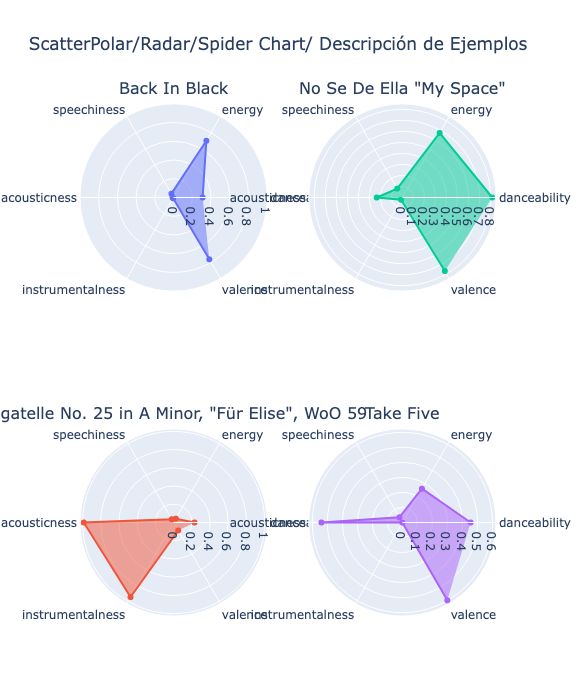

In [6]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=2,
    cols=2,
    specs=[
        [{"type": "polar"}, {"type": "polar"}],
        [{"type": "polar"}, {"type": "polar"}],
    ],
    subplot_titles=[
        ejemplo1.loc[6, "Valor"], ejemplo3.loc[6, "Valor"],
        ejemplo2.loc[6, "Valor"], ejemplo4.loc[6, "Valor"],
    ],
)

for i, ejemplo in enumerate(ejemplos):
    fig.add_trace(
        go.Scatterpolar(
            r=ejemplo.loc[0:5, "Valor"],
            theta=ejemplo.loc[0:5, "Descriptor"],
            fill="toself",
            name=f"{ejemplo.loc[6, 'Valor']} - {ejemplo.loc[7, 'Valor']} ({ejemplo.loc[8, 'Valor']})",
        ),
        col=i // 2 + 1,
        row=i % 2 + 1,
    )

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[0, 1])),
    showlegend=False,
    title="ScatterPolar/Radar/Spider Chart/ Descripción de Ejemplos",
    height=700,
)

fig.show()

#### Correlaciones

In [7]:
corr = df.loc[
    :,
    [
        "danceability",
        "energy",
        "speechiness",
        "acousticness",
        "instrumentalness",
        "valence",
        "name",
        "artist",
        "genre",
    ],
].corr()

/var/folders/44/jk44qt6d1yd5pj0ttd1f2v9h0000gn/T/ipykernel_4851/905422183.py:14: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



#### Histogramas

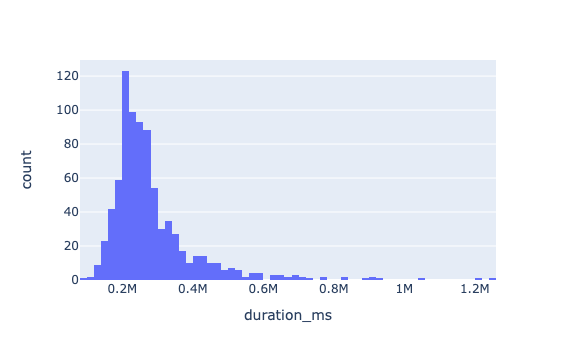

In [9]:
px.histogram(df, x="duration_ms")

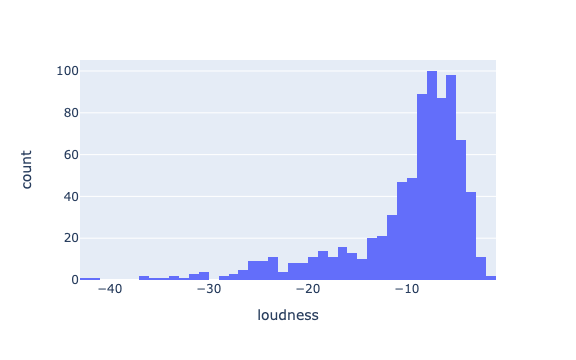

In [10]:
px.histogram(df, x="loudness")

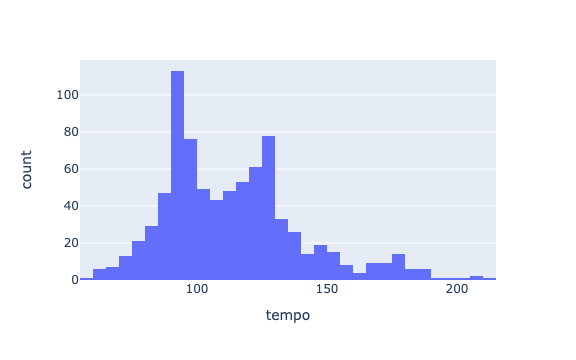

In [11]:
px.histogram(df, x="tempo")

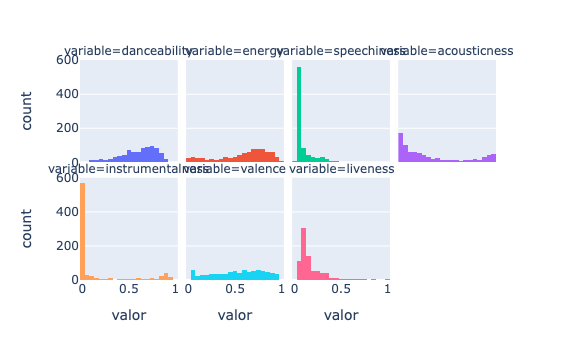

In [12]:
dt_to_hists = df.loc[
    :,
    [
        "danceability",
        "energy",
        "speechiness",
        "acousticness",
        "instrumentalness",
        "valence",
        "liveness",
        "genre",
    ],
].melt(id_vars=["genre"], var_name="variable", value_name="valor")

px.histogram(
    dt_to_hists, x="valor", color="variable", facet_col="variable", facet_col_wrap=4
).update_layout(showlegend=False)

### Correlaciones

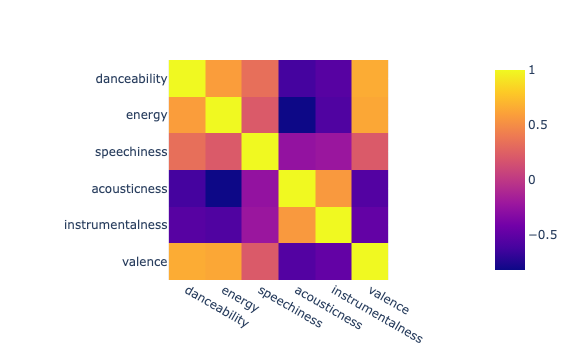

In [13]:
px.imshow(corr)

---

## Preparando los Datos

In [15]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

Para este clase usaremos los siguientes atributos:

In [19]:
df_ = df.loc[
    :,
    [
        "danceability",
        "energy",
        "speechiness",
        "acousticness",
        "instrumentalness",
        "valence",
        "liveness",
        "duration_ms",
        "loudness",
        "name",
        "genre",
    ],
]

df_

danceability  energy  speechiness  acousticness  instrumentalness  \
0           0.617   0.771       0.1120        0.0384          0.000003   
1           0.788   0.674       0.0537        0.2810          0.033000   
2           0.745   0.744       0.0837        0.0266          0.000018   
3           0.782   0.767       0.0871        0.2660          0.000036   
4           0.702   0.864       0.0818        0.1080          0.000000   
..            ...     ...          ...           ...               ...   
809         0.801   0.795       0.0504        0.0417          0.000113   
810         0.481   0.451       0.0347        0.3360          0.000000   
811         0.638   0.656       0.0357        0.1880          0.000000   
812         0.630   0.698       0.0244        0.1730          0.000000   
813         0.564   0.714       0.1290        0.0549          0.000000   

     valence  liveness  duration_ms  loudness                name      genre  
0      0.553    0.1620       267747    -5.586  Salgo Pa' la Calle  Reggaeton  
1      0.864    0.0892       214747    -8.392     Dile A Tu Amiga  Reggaeton  
2      0.849    0.0959       244663    -8.230       Nada Va Pasar  Reggaeton  
3      0.622    0.0947       304091    -7.981           Zun Da Da  Reggaeton  
4      0.788    0.1870       215118    -5.496   Fuera del Planeta  Reggaeton  
..       ...       ...          ...       ...                 ...        ...  
809    0.754    0.0717       163253    -5.115       Feel It Still        Pop  
810    0.289    0.0872       295493    -6.095               Hello        Pop  
811    0.225    0.1460       262467    -5.886       Bleeding Love        Pop  
812    0.529    0.0789       261427    -4.510           Breakeven        Pop  
813    0.330    0.1550       204013    -4.987          Fight Song        Pop  

[814 rows x 11 columns]

In [20]:
df_.describe()

danceability      energy  speechiness  acousticness  instrumentalness  \
count    814.000000  814.000000   814.000000    814.000000        814.000000   
mean       0.600392    0.589244     0.090809      0.324999          0.159151   
std        0.196368    0.268840     0.095219      0.342813          0.304559   
min        0.062300    0.002100     0.023200      0.000017          0.000000   
25%        0.479250    0.417500     0.036500      0.033450          0.000000   
50%        0.641500    0.663500     0.047550      0.180000          0.000405   
75%        0.753000    0.799000     0.098000      0.575250          0.095600   
max        0.976000    0.989000     0.817000      0.996000          0.958000   

          valence    liveness   duration_ms    loudness  
count  814.000000  814.000000  8.140000e+02  814.000000  
mean     0.532020    0.181294  2.838903e+05  -10.017713  
std      0.268382    0.151797  1.284673e+05    6.429775  
min      0.030800    0.031100  8.426700e+04  -42.238000  
25%      0.324000    0.090675  2.112300e+05  -11.555500  
50%      0.569000    0.122000  2.512800e+05   -7.997500  
75%      0.754000    0.226750  3.087402e+05   -5.854750  
max      0.981000    0.987000  1.252322e+06   -1.446000

### `MinMaxScaler`

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

ct = ColumnTransformer(
    [("MinMax", MinMaxScaler(), ["duration_ms", "loudness"])], remainder="passthrough"
)


pipe = Pipeline([("Preprocesamiento", ct)])

In [22]:
features_to_scale = df_.iloc[:, :-2]  # eliminar nombre y género

pipe.fit_transform(features_to_scale)

array([[1.57081644e-01, 8.98509512e-01, 6.17000000e-01, ...,
        3.32000000e-06, 5.53000000e-01, 1.62000000e-01],
       [1.11707069e-01, 8.29721514e-01, 7.88000000e-01, ...,
        3.30000000e-02, 8.64000000e-01, 8.92000000e-02],
       [1.37318876e-01, 8.33692881e-01, 7.45000000e-01, ...,
        1.84000000e-05, 8.49000000e-01, 9.59000000e-02],
       ...,
       [1.52561309e-01, 8.91155128e-01, 6.38000000e-01, ...,
        0.00000000e+00, 2.25000000e-01, 1.46000000e-01],
       [1.51670940e-01, 9.24887233e-01, 6.30000000e-01, ...,
        0.00000000e+00, 5.29000000e-01, 7.89000000e-02],
       [1.02517433e-01, 9.13193763e-01, 5.64000000e-01, ...,
        0.00000000e+00, 3.30000000e-01, 1.55000000e-01]])

In [23]:
# transformamos el resultado de la transformación a un dataframe:

scaled_features = pd.DataFrame(
    pipe.fit_transform(features_to_scale), columns=features_to_scale.columns
)

scaled_features

danceability    energy  speechiness  acousticness  instrumentalness  \
0        0.157082  0.898510        0.617         0.771            0.1120   
1        0.111707  0.829722        0.788         0.674            0.0537   
2        0.137319  0.833693        0.745         0.744            0.0837   
3        0.188197  0.839797        0.782         0.767            0.0871   
4        0.112025  0.900716        0.702         0.864            0.0818   
..            ...       ...          ...           ...               ...   
809      0.067622  0.910056        0.801         0.795            0.0504   
810      0.180836  0.886032        0.481         0.451            0.0347   
811      0.152561  0.891155        0.638         0.656            0.0357   
812      0.151671  0.924887        0.630         0.698            0.0244   
813      0.102517  0.913194        0.564         0.714            0.1290   

     valence  liveness  duration_ms  loudness  
0     0.0384  0.000003        0.553    0.1620  
1     0.2810  0.033000        0.864    0.0892  
2     0.0266  0.000018        0.849    0.0959  
3     0.2660  0.000036        0.622    0.0947  
4     0.1080  0.000000        0.788    0.1870  
..       ...       ...          ...       ...  
809   0.0417  0.000113        0.754    0.0717  
810   0.3360  0.000000        0.289    0.0872  
811   0.1880  0.000000        0.225    0.1460  
812   0.1730  0.000000        0.529    0.0789  
813   0.0549  0.000000        0.330    0.1550  

[814 rows x 9 columns]

In [24]:
scaled_features.describe()

danceability      energy  speechiness  acousticness  instrumentalness  \
count    814.000000  814.000000   814.000000    814.000000        814.000000   
mean       0.170902    0.789868     0.600392      0.589244          0.090809   
std        0.109984    0.157623     0.196368      0.268840          0.095219   
min        0.000000    0.000000     0.062300      0.002100          0.023200   
25%        0.108696    0.752170     0.479250      0.417500          0.036500   
50%        0.142984    0.839393     0.641500      0.663500          0.047550   
75%        0.192177    0.891921     0.753000      0.799000          0.098000   
max        1.000000    1.000000     0.976000      0.989000          0.817000   

          valence    liveness  duration_ms    loudness  
count  814.000000  814.000000   814.000000  814.000000  
mean     0.324999    0.159151     0.532020    0.181294  
std      0.342813    0.304559     0.268382    0.151797  
min      0.000017    0.000000     0.030800    0.031100  
25%      0.033450    0.000000     0.324000    0.090675  
50%      0.180000    0.000405     0.569000    0.122000  
75%      0.575250    0.095600     0.754000    0.226750  
max      0.996000    0.958000     0.981000    0.987000

---

## `UMAP` - Proyectamos con UMAP

In [26]:
from umap import UMAP

proyector = UMAP(random_state=88, n_neighbors=20, min_dist=0.15)

projections = proyector.fit_transform(scaled_features)

In [29]:
projections.shape

(814, 2)

In [27]:
# este dataframe lo estaremos usando para graficar de aquí en adelante
fig_df = pd.concat(
    [
        df.loc[:, ["name", "artist", "genre"]],
        scaled_features,
        pd.DataFrame(projections, columns=["x", "y"]),
    ],
    axis=1,
)

fig_df

name             artist      genre  danceability    energy  \
0    Salgo Pa' la Calle       Daddy Yankee  Reggaeton      0.157082  0.898510   
1       Dile A Tu Amiga               Ñejo  Reggaeton      0.111707  0.829722   
2         Nada Va Pasar      Yaga Y Mackie  Reggaeton      0.137319  0.833693   
3             Zun Da Da               Zion  Reggaeton      0.188197  0.839797   
4     Fuera del Planeta              Randy  Reggaeton      0.112025  0.900716   
..                  ...                ...        ...           ...       ...   
809       Feel It Still  Portugal. The Man        Pop      0.067622  0.910056   
810               Hello              Adele        Pop      0.180836  0.886032   
811       Bleeding Love        Leona Lewis        Pop      0.152561  0.891155   
812           Breakeven         The Script        Pop      0.151671  0.924887   
813          Fight Song     Rachel Platten        Pop      0.102517  0.913194   

     speechiness  acousticness  instrumentalness  valence  liveness  \
0          0.617         0.771            0.1120   0.0384  0.000003   
1          0.788         0.674            0.0537   0.2810  0.033000   
2          0.745         0.744            0.0837   0.0266  0.000018   
3          0.782         0.767            0.0871   0.2660  0.000036   
4          0.702         0.864            0.0818   0.1080  0.000000   
..           ...           ...               ...      ...       ...   
809        0.801         0.795            0.0504   0.0417  0.000113   
810        0.481         0.451            0.0347   0.3360  0.000000   
811        0.638         0.656            0.0357   0.1880  0.000000   
812        0.630         0.698            0.0244   0.1730  0.000000   
813        0.564         0.714            0.1290   0.0549  0.000000   

     duration_ms  loudness          x         y  
0          0.553    0.1620  12.627859  6.186992  
1          0.864    0.0892  15.047752  9.393023  
2          0.849    0.0959  15.010042  6.692925  
3          0.622    0.0947  13.261496  7.768145  
4          0.788    0.1870  14.790083  8.145337  
..           ...       ...        ...       ...  
809        0.754    0.0717  14.094094  7.374340  
810        0.289    0.0872   9.642288  4.955276  
811        0.225    0.1460  10.464338  5.479371  
812        0.529    0.0789  10.333243  6.304666  
813        0.330    0.1550  11.188092  5.567913  

[814 rows x 14 columns]

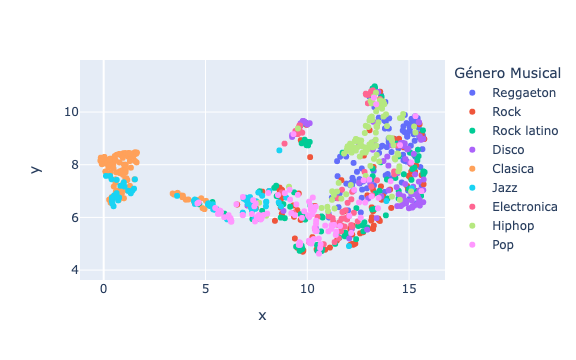

In [30]:
def get_scatter(fig_df, color_col):
    fig = px.scatter(
        fig_df,
        x="x",
        y="y",
        color=color_col,
        hover_name=df["artist"] + " - " + df["name"],
        labels={"genre": "Género Musical"},
        hover_data=[
            "danceability",
            "energy",
            "speechiness",
            "acousticness",
            "instrumentalness",
            "valence",
        ],
        range_x=(fig_df["x"].min() - 1, fig_df["x"].max() + 1),
        range_y=(fig_df["y"].min() - 1, fig_df["y"].max() + 1),
    )
    return fig


get_scatter(fig_df, "genre")

---

**Aquí empezamos clustering**

### K-Means

Técnica de clustering de tipo particional.

Encuentra centros de clusters que minimizan la suma de distancias entre los datos y el centro de cada cluster.

Algoritmo:

---


    Seleccionar K centroides iniciales.
    repite: 
        Asigna todos los puntos a sus centros más cercanos.
        Recomputa los centros de cada cluster.
    hasta que los centros no cambien.

---
*Hasta que los centros no cambian* equivale a minimizar la suma de errores cuadrados SSE:

$$SSE = \sum_{i=1}^{K} \sum_{x\in C_i} d(c_i, x)^2 $$

Comunmente la función de distancia $d$ es la distancia euclideana $d(x,y) = \sqrt{\sum_{i}(x_i, y_i)^2}$ .

<div align='center'>

<img src='https://github.com/MDS7202/MDS7202/blob/main/recursos/2023-01/17-Clustering/kmeans_example.png?raw=true' width=500/>
</div>

<div align='center'>
    Fuente: <a href='https://www.jparzival.com/blog/como-funciona-k-means/'>
¿Cómo funciona K-Means?
 en jparzival.com
</div>


> **Pregunta**: ¿Qué sucede si se elige un mal ejemplo inicial?

In [31]:
# Random State permite controlar la aleatoridad.
# Es decir, permite generar los mismos números aleatorios en distintas ejecuciones.
RANDOM_STATE = 99

In [32]:
from sklearn.cluster import KMeans

# El número de clusters es parámetro. En este caso, es 2.
kmeans = KMeans(n_clusters=2, random_state=RANDOM_STATE).fit(scaled_features)

labels = kmeans.labels_

/Users/imezadelajara/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Podemos acceder a los centroides calculados.

In [35]:
scaled_features.iloc[0]

danceability        0.157082
energy              0.898510
speechiness         0.617000
acousticness        0.771000
instrumentalness    0.112000
valence             0.038400
liveness            0.000003
duration_ms         0.553000
loudness            0.162000
Name: 0, dtype: float64

In [33]:
# Clusters calculados por cada observación de entrenamiento
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [38]:
# Centroides calculados.
kmeans.cluster_centers_

array([[0.15073307, 0.85196238, 0.66700619, 0.70145046, 0.103437  ,
        0.17721246, 0.05296682, 0.6178195 , 0.19254319],
       [0.24845794, 0.55109939, 0.34424405, 0.15778518, 0.0422494 ,
        0.89327381, 0.56745668, 0.20209881, 0.1380375 ]])

In [42]:
# También podemos acceder a la suma de errores cuadráticos (llamada inercia en scikit)
kmeans.inertia_

181.532174755157

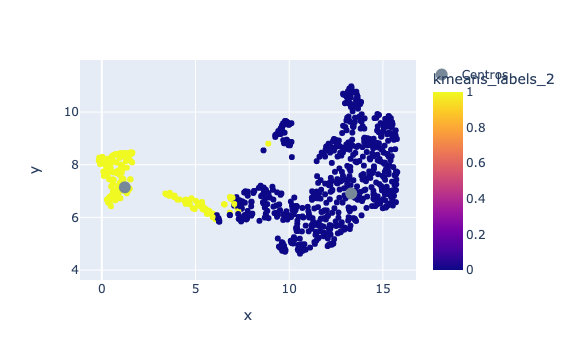

In [39]:
fig_df["kmeans_labels_2"] = kmeans.labels_
fig = get_scatter(fig_df, "kmeans_labels_2")

# Transformamos los centro que vimos anteriormentes a la proyección 2d.
projected_centers = proyector.transform(kmeans.cluster_centers_)

fig.add_trace(
    go.Scatter(
        x=projected_centers[:, 0],
        y=projected_centers[:, 1],
        mode="markers",
        name="Centros",
        marker_size=12,
        marker_color="LightSlateGray",
    )
)

In [58]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(scaled_features)
labels = kmeans.labels_


fig_df["kmeans_labels_5"] = kmeans.labels_
fig = get_scatter(fig_df, "kmeans_labels_5")

/Users/imezadelajara/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



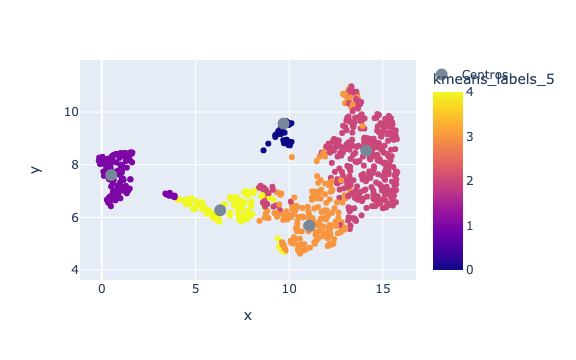

In [42]:
# Transformamos los centro que vimos anteriormentes a la proyección 2d.
centros_pryectados = proyector.transform(kmeans.cluster_centers_)

fig = get_scatter(fig_df, "kmeans_labels_5")
fig.add_trace(
    go.Scatter(
        x=centros_pryectados[:, 0],
        y=centros_pryectados[:, 1],
        mode="markers",
        name="Centros",
        marker_size=12,
        marker_color="LightSlateGray",
    )
)

> **Pregunta:** ¿Qué pasaría si ejecutamos el clustering con los datos no escalados?

> **Pregunta:** ¿Cómo identificamos la cantidad de cluster óptimos?


### Método del Codo



![Método del Codo](https://github.com/MDS7202/MDS7202/blob/main/recursos/2023-01/17-Clustering/elbow.png?raw=true)

In [43]:
intertias = [
    [i, KMeans(n_clusters=i, random_state=0).fit(scaled_features).inertia_]
    for i in range(2, 20)
]

intertias = pd.DataFrame(intertias, columns=["n° clusters", "inertia"])
intertias.head(10)

/Users/imezadelajara/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/imezadelajara/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/imezadelajara/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/imezadelajara/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/imezadelajara/anaconda3/lib/python3.10/si

n° clusters     inertia
0            2  181.532175
1            3  144.471939
2            4  123.429872
3            5  110.940664
4            6  102.200578
5            7   94.050907
6            8   88.906285
7            9   84.488327
8           10   81.496597
9           11   77.565260

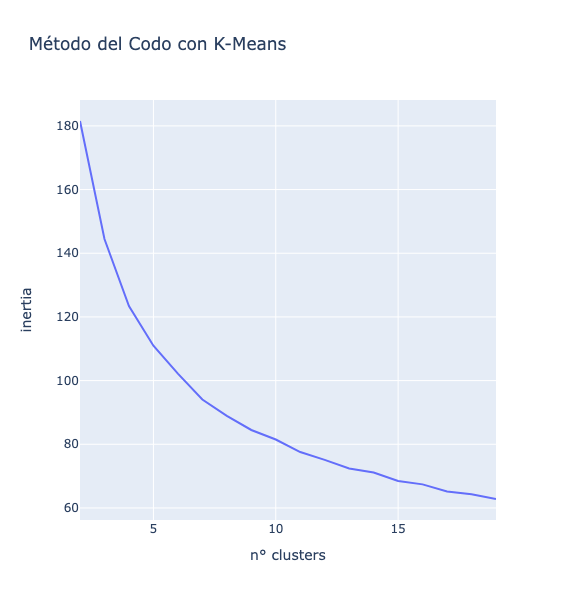

In [44]:
px.line(
    intertias,
    x="n° clusters",
    y="inertia",
    title="Método del Codo con K-Means",
    height=600,
)

**Alternativa: Coeficiente de Silohuette**


El valor de la silueta es una medida de cuán similar es un objeto respecto a su propio cluster en comparación con los otros.  


Por cada elemento se calcula: 

$$s = \frac{b-a}{\max(a,b)}$$

donde: 

- $a$ es el promedio de las distancias entre el elemento y todos los otros elementos del cluster al cual el elemento analizado fue etiquetado.
- $b$ es la distancia entre el elemento y el centro del cluster más cercano.

La silueta va de -1 a +1 donde 
- un valor cercano a 1: indica que el objeto está bien clusterizado
- cercano a 0: indica que el elemento está entre dos clusters
- cercano a $-1$: indica que el elemento está mal asignado. 

Si la mayoría de los objetos tienen un valor alto, entonces podemos decir que los elementos del cluster están bien asignados.

Por último, el coeficiente de silueta se calcula al promediar todos los coeficientes individuales.

In [45]:
from sklearn.metrics import silhouette_score

scores = [
    [
        i,
        silhouette_score(
            scaled_features,
            KMeans(n_clusters=i, random_state=99).fit(scaled_features).labels_,
        ),
    ]
    for i in range(2, 20)
]

scores = pd.DataFrame(scores, columns=["n° clusters", "silhouette_score"])
scores.head(10)

/Users/imezadelajara/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/imezadelajara/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/imezadelajara/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/imezadelajara/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/imezadelajara/anaconda3/lib/python3.10/si

n° clusters  silhouette_score
0            2          0.525233
1            3          0.373903
2            4          0.264552
3            5          0.274001
4            6          0.275480
5            7          0.270944
6            8          0.220724
7            9          0.204905
8           10          0.203284
9           11          0.197079

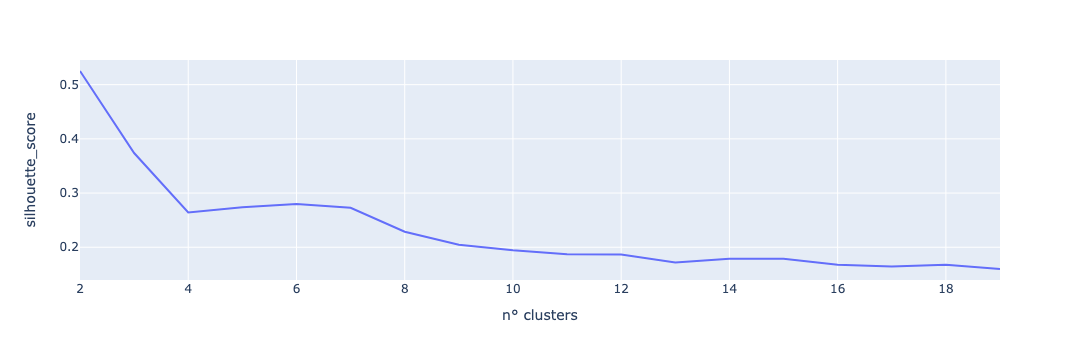

In [49]:
px.line(scores, x="n° clusters", y="silhouette_score")

**Más opciones:**

https://medium.com/@haataa/how-to-measure-clustering-performances-when-there-are-no-ground-truth-db027e9a871c

---


## `DBSCAN`
	

Algoritmo de clustering basado en densidad. Ideal para buscar outliers.

- Densidad: Número de puntos en un círculo.
- Idea: Regiones densas representan clusters.

Parámetros: 

- `Eps`: radio de los círculos
- `MinPts`: número mínimo de puntos de una región.


- Es comunmente resistente al ruido.
- Problemas en regiones con distintas densidades.


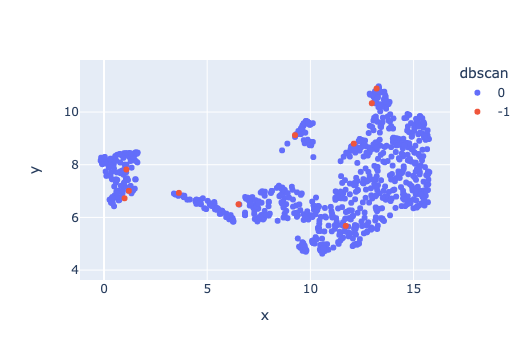

In [47]:
import numpy as np
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.4, min_samples=3)
dbscan.fit(scaled_features)

fig_df["dbscan"] = pd.Series(dbscan.labels_, dtype=str)

get_scatter(fig_df, "dbscan")

### Visualizando el parámetro eps

In [48]:
import numpy as np

epss = np.arange(0.1, 1, 0.2)
epss

array([0.1, 0.3, 0.5, 0.7, 0.9])

In [49]:
clustering = [
    DBSCAN(eps=eps, min_samples=2).fit_predict(scaled_features) for eps in epss
]

dbscan_labels = pd.DataFrame(np.array(clustering)).T
dbscan_labels.columns = epss

dbscan_labels["x"] = projections[:, 0]
dbscan_labels["y"] = projections[:, 1]

dbscan_labels = dbscan_labels.melt(
    id_vars=["x", "y"], var_name="eps", value_name="label"
)
dbscan_labels["label"] = dbscan_labels["label"].astype(str)
dbscan_labels.sample(10)

x         y  eps label
2944   0.111536  7.575252  0.7     0
2560  13.618347  7.176996  0.7     0
1964   9.672420  9.572959  0.5     0
1809  13.565844  5.864532  0.5     0
3759   3.604398  6.818227  0.9     0
879   15.449080  9.169396  0.3     0
1688  13.510741  9.787560  0.5     0
4050  10.429530  5.758195  0.9     0
3042  11.278291  5.833554  0.7     0
3920  12.648370  8.917766  0.9     0

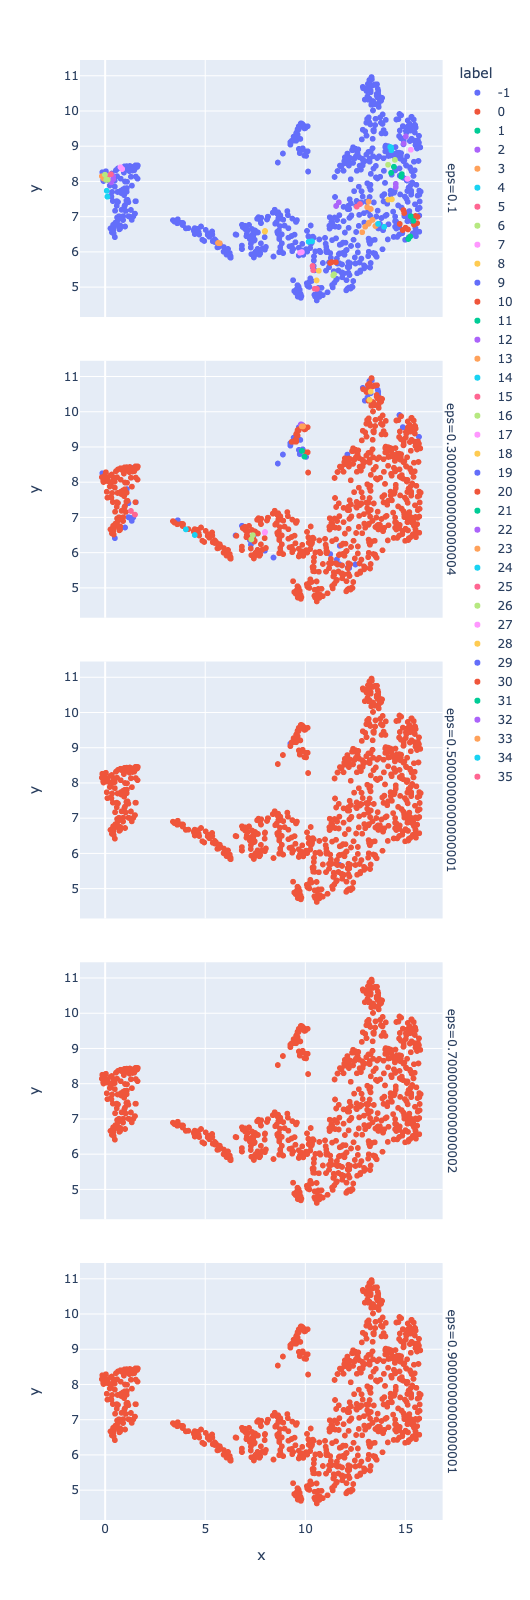

In [50]:
fig = px.scatter(
    dbscan_labels,
    x="x",
    y="y",
    facet_row="eps",
    color="label",
    # range_x=(projections[:, 0].min() - 1, projections[:, 1].max() + 1),
    # range_y=(projections[:, 0].min() - 1, projections[:, 1].max() + 1),
    height=1600,
)
fig.show()

---

## Clustering Jerárquico
</br>
<div align='center'>
<img src='https://github.com/MDS7202/MDS7202/blob/main/recursos/2023-01/17-Clustering/clustering_jerarquico.png?raw=true' width=400 />
</div>

> **Pregunta**: ¿Cómo los agrupamos?

Requieren que exista una **definición de distancia** entre los elementos que se desean agrupar.

<div align='center'>
<img src='https://github.com/MDS7202/MDS7202/blob/main/recursos/2023-01/17-Clustering/matriz_distancias.png?raw=true' width=800 />
</div>


### Tipos

#### Aglomerativo

- Empezar con cada punto como cluster individual•
- En cada paso, mezclar el par de clusters más cercano hasta que quede sólo un cluster (o k clusters) 

#### Divisivo

- Empezar con un cluster que contenga todos los puntos
- En cada paso, dividir un cluster en dos hasta que todo cluster contenga un solo punto (o haya k clusters)




### Algortimo básico Aglomerativo


---

    Partimos con que cada punto es cluster por separado.
    Calculamos la matriz de distancias.
    Repetimos :
        Unimos los puntos/clusters (usando la matriz de distancias) en un solo cluster según algún criterio/enlace.
    hasta que ya no podamos unir nada más.
---


### Tipos de Enlaces entre Clusters


El enlace determina como se irán uniendo los distintos clusters que se irán generando. Existen varias opciones: 

- **Máx - Enlace Completo** (`complete`): Va uniendo puntos/clusters mas lejanos.


- **Min - Enlace Simple** (`simple`): Va uniendo puntos/clusters mas cercanos.


- **Promedio entre grupos** (`average`): Va uniendo según el promedio de la distancia de todos contra todos


- **Ward (`ward`)**: Va uniendo al minimizar la suma de las diferencias cuadradas entre cluster. Muy similar a lo que hace K-Means.


La opción elegida puede provocar variaciones gigantezcas entre los clusters producidos.

In [51]:
import numpy as np
import plotly.figure_factory as ff
from scipy.cluster.hierarchy import average, complete, dendrogram, single, ward
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris

#### Máx - Enlace Completo (`complete`)
    
<div align='center'>
<img src='https://github.com/MDS7202/MDS7202/blob/main/recursos/2023-01/17-Clustering/agglomerative_max.png?raw=true' width=400 />
</div>
    
$$\max\{(d(x,y): x \in A, y \in B)\}$$  
    
    
- Poco suceptible a outliers.
- Tiende a quebrar clusters grandes. 
- Tiende a formar clusters esféricos.

In [52]:
sample = scaled_features.sample(20, random_state=RANDOM_STATE)
sample

danceability    energy  speechiness  acousticness  instrumentalness  \
477      0.096856  0.278363        0.161        0.0144            0.0365   
470      0.102586  0.556800        0.253        0.1770            0.0346   
219      0.187400  0.825652        0.401        0.6720            0.0468   
115      0.244280  0.867866        0.483        0.7210            0.0320   
427      0.389137  0.690650        0.398        0.3730            0.0524   
22       0.111170  0.896107        0.897        0.7550            0.1440   
411      0.070967  0.633556        0.223        0.1650            0.0504   
368      0.205333  0.776059        0.794        0.5050            0.0331   
329      0.253230  0.686532        0.740        0.6620            0.0505   
659      0.122026  0.823519        0.858        0.7670            0.3020   
730      0.071423  0.921602        0.654        0.6300            0.0259   
17       0.019952  0.929128        0.805        0.8520            0.0986   
191      0.142230  0.837149        0.691        0.5920            0.0366   
800      0.142117  0.890738        0.258        0.6590            0.0596   
592      0.038323  0.890003        0.795        0.6610            0.0398   
716      0.083809  0.896230        0.501        0.4050            0.0319   
469      0.131580  0.462321        0.244        0.0325            0.0457   
715      0.090081  0.858722        0.764        0.3200            0.0546   
790      0.154436  0.826535        0.476        0.2550            0.0338   
48       0.129697  0.860291        0.811        0.6720            0.1020   

     valence  liveness  duration_ms  loudness  
477  0.98600  0.117000       0.0336    0.0836  
470  0.89400  0.573000       0.2420    0.6680  
219  0.02050  0.000043       0.5490    0.1520  
115  0.72900  0.000000       0.5620    0.1890  
427  0.88900  0.193000       0.6100    0.1210  
22   0.00758  0.000451       0.5670    0.2640  
411  0.98400  0.950000       0.0518    0.3480  
368  0.11100  0.005550       0.8940    0.1670  
329  0.03240  0.092000       0.9300    0.0603  
659  0.00666  0.000000       0.7530    0.0489  
730  0.15300  0.000000       0.4300    0.1110  
17   0.43700  0.000001       0.7140    0.0798  
191  0.38900  0.000033       0.7360    0.1240  
800  0.25300  0.000000       0.2720    0.1110  
592  0.02390  0.028900       0.4600    0.2870  
716  0.75100  0.000000       0.4460    0.1050  
469  0.99200  0.879000       0.0406    0.1080  
715  0.83700  0.000000       0.5750    0.0822  
790  0.79200  0.000000       0.1200    0.1140  
48   0.17800  0.000000       0.5160    0.4660

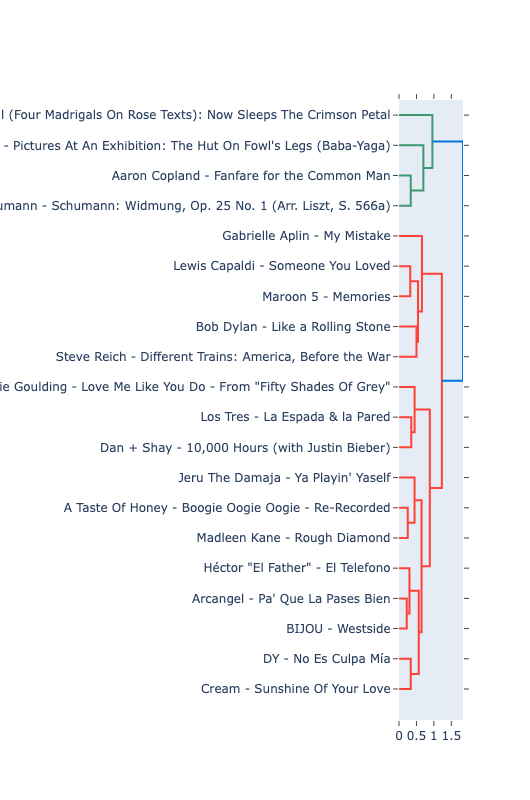

In [54]:
# plot the top three levels of the dendrogram
ff.create_dendrogram(
    sample,
    labels=(
        df.loc[sample.index, "artist"] + " - " + df.loc[sample.index, "name"]
    ).values,
    linkagefun=complete,
    orientation="left",
    color_threshold=1.5,
).update_layout(width=1000, height=800)

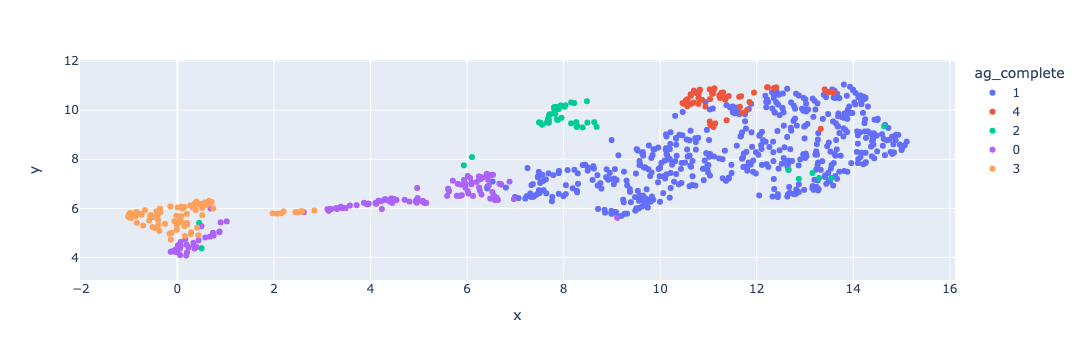

In [59]:
model = AgglomerativeClustering(n_clusters=5, linkage="complete")
labels = model.fit_predict(scaled_features)

fig_df["ag_complete"] = pd.Series(model.labels_, dtype=str)

get_scatter(fig_df, "ag_complete")

#### Mín - Enlace Simple (`single`)

<div align='center'>
<img src='https://github.com/MDS7202/MDS7202/blob/main/recursos/2023-01/17-Clustering/agglomerative_min.png?raw=true' width=400 />
</div>

$$\min\{(d(x,y): x \in A, y \in B)\}$$  


- Puede manejar formas no elípticas
- Tiende a romper clusters.
- Sensible a ruido y outliers.




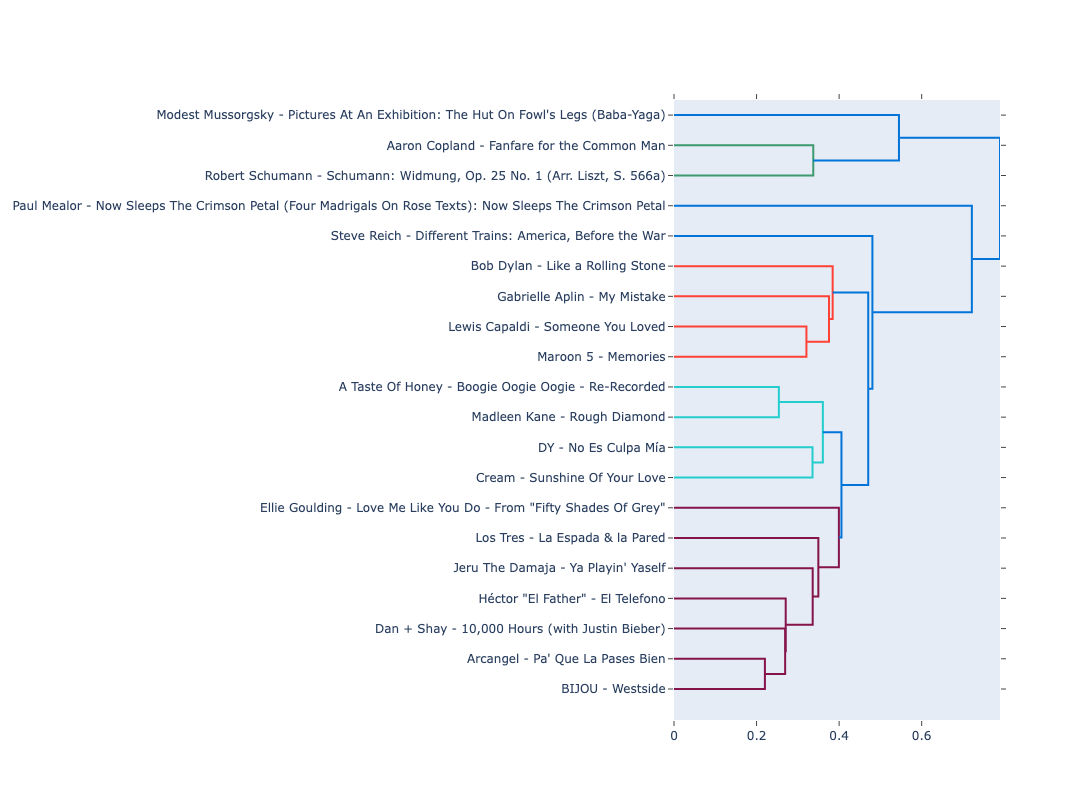

In [60]:
# plot the top three levels of the dendrogram
ff.create_dendrogram(
    sample,
    labels=(
        df.loc[sample.index, "artist"] + " - " + df.loc[sample.index, "name"]
    ).values,
    linkagefun=single,
    orientation="left",
    color_threshold=0.4,
).update_layout(width=1000, height=800)

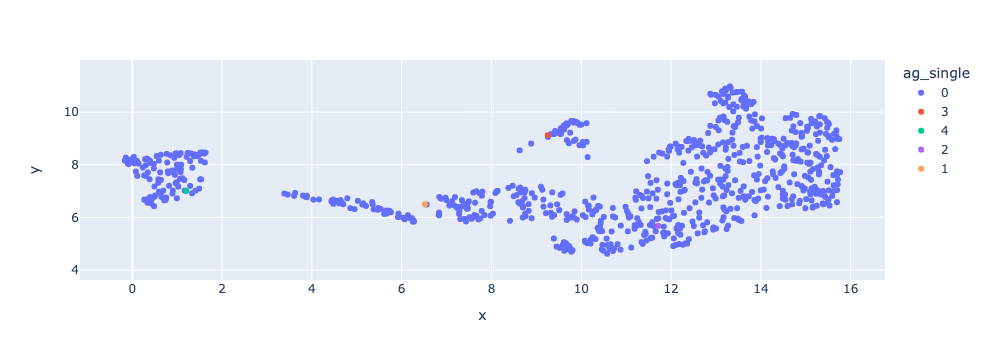

In [55]:
model = AgglomerativeClustering(n_clusters=5, linkage="single")
labels = model.fit_predict(scaled_features)


fig_df["ag_single"] = pd.Series(model.labels_, dtype=str)
get_scatter(fig_df, "ag_single")

#### Promedio (`average`)

<div align='center'>
<img src='https://github.com/MDS7202/MDS7202/blob/main/recursos/2023-01/17-Clustering/agglomerative_mean.png?raw=true' width=400 />
</div>


- Compromiso entre min y max.
- Menos suceptible a ruidos y outliers.
- Sesgado a clusters esféricos

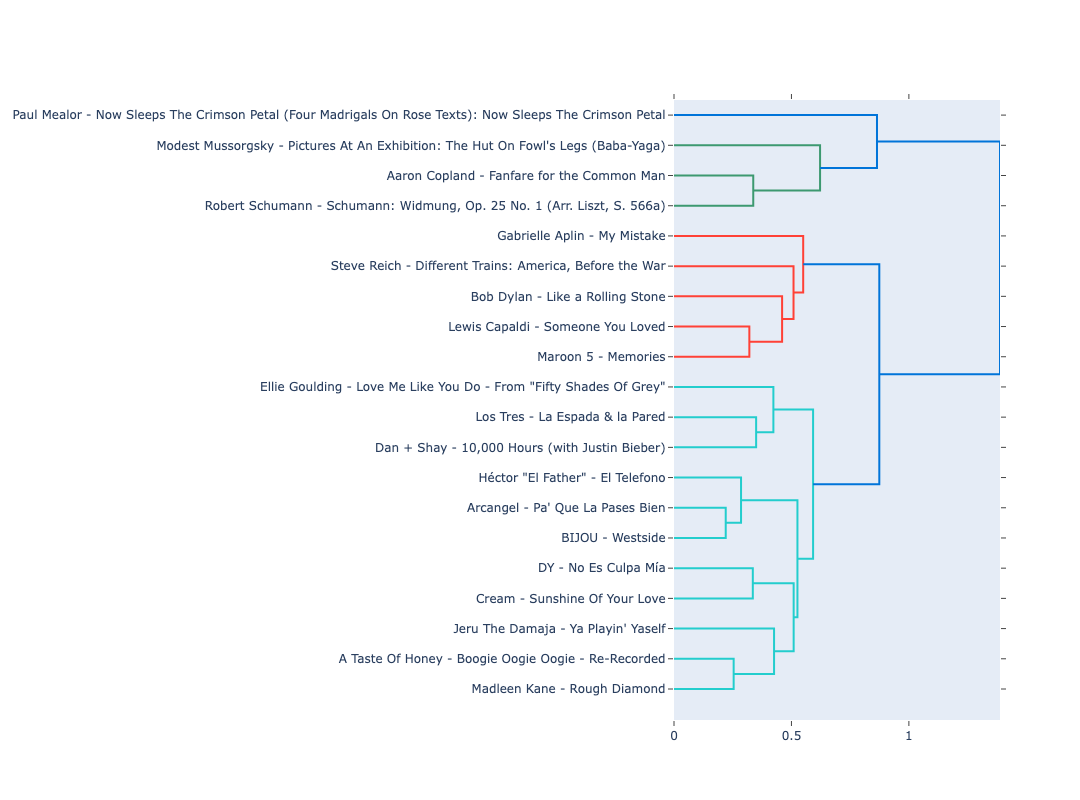

In [62]:
# plot the top three levels of the dendrogram
ff.create_dendrogram(
    sample,
    labels=(
        df.loc[sample.index, "artist"] + " - " + df.loc[sample.index, "name"]
    ).values,
    linkagefun=average,
    orientation="left",
    color_threshold=0.8,
).update_layout(width=1000, height=800)

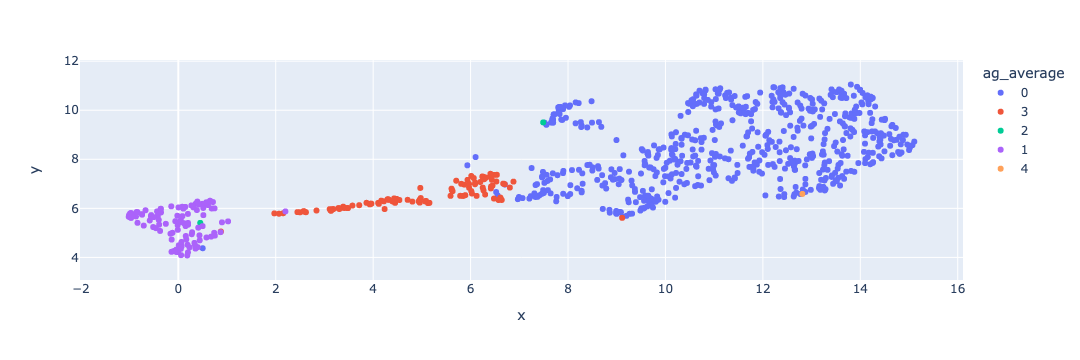

In [63]:
model = AgglomerativeClustering(n_clusters=5, linkage="average")
labels = model.fit_predict(scaled_features)

fig_df["ag_average"] = pd.Series(model.labels_, dtype=str)
get_scatter(fig_df, "ag_average")

#### Ward (`ward`)

$$\frac{1}{|A|\cdot|B|} \sum_{x \in A} \sum_{x \in B} d(x,y)$$
    

Busca minimizar el incremento del SSE cuando se mezclan dos clusters


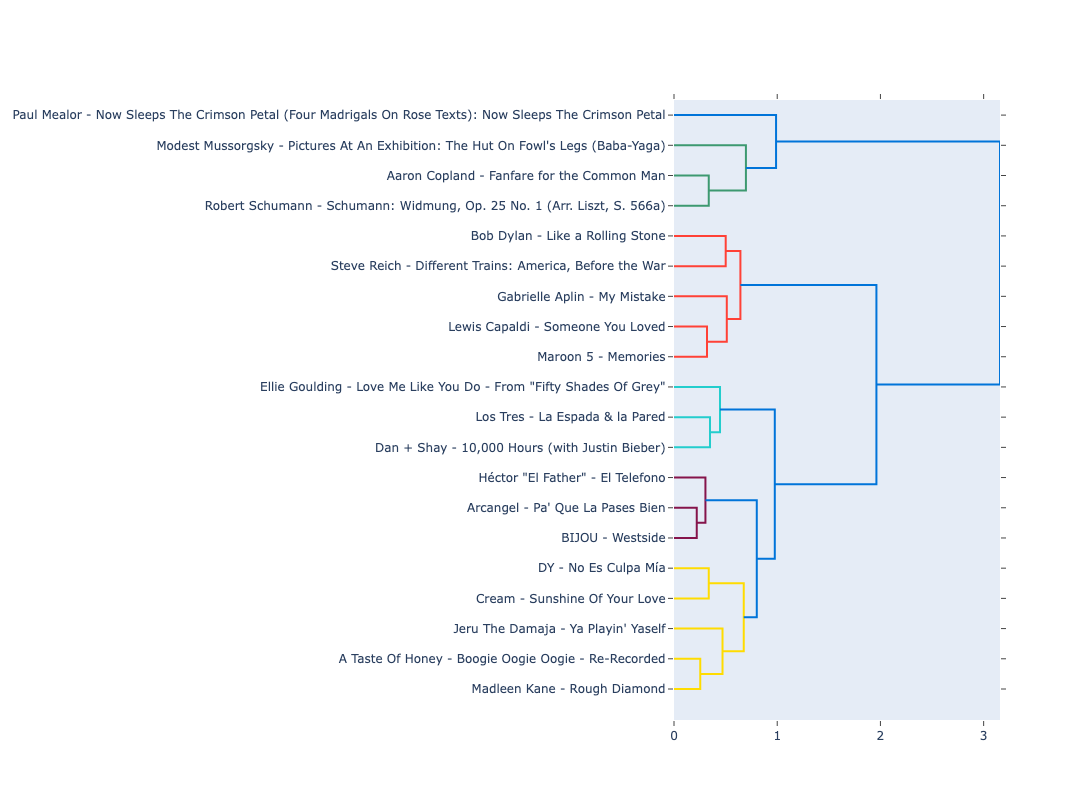

In [64]:
# plot the top three levels of the dendrogram
ff.create_dendrogram(
    sample,
    labels=(
        df.loc[sample.index, "artist"] + " - " + df.loc[sample.index, "name"]
    ).values,
    linkagefun=ward,
    orientation="left",
    color_threshold=0.8,
).update_layout(width=1000, height=800)

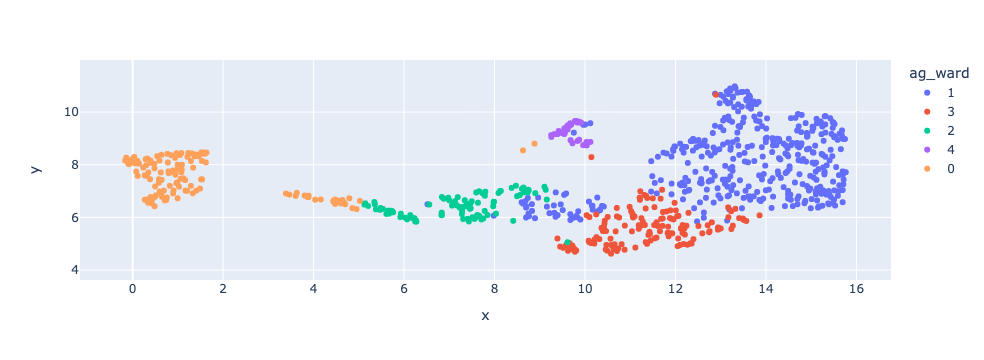

In [57]:
model = AgglomerativeClustering(n_clusters=5, linkage="ward")
labels = model.fit_predict(scaled_features)

fig_df["ag_ward"] = pd.Series(model.labels_, dtype=str)
get_scatter(fig_df, "ag_ward")

### Resumen clustering jerárquicos

Ventajas: 
    
- No hay que suponer a priori el número de clases.
- Podemos escoger el número de clusters cortando el dendograma. 


Desventajas:

- No hay función objetivo por minimizar.
- Diferentes esquemas presentan diferentes problemas.
- Memoria $O (n^2)$, Tiempo $O (N^2\log(N)$